In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

In [4]:
def basic_global_thresholding(Img,T0=0.1): #输入的图像要求为灰度图像
    '''
    :param Img: 需进行全阈值分割的图像
    :param T0: 迭代终止容差，当相临迭代得到的阈值差小于此值，则终止迭代
    :return: 全阈值
    '''
    G1 = np.zeros(Img.shape, np.uint8)  # 定义矩阵分别用来装被阈值T1分开的两部分
    G2 = np.zeros(Img.shape, np.uint8)
    T1 = np.mean(Img)
    diff=255
    while(diff>T0):
        _,G1=cv2.threshold(Img,T1,255,cv2.THRESH_TOZERO_INV) #THRESH_TOZERO	超过thresh的像素不变, 其他设为0
        _,G2=cv2.threshold(Img,T1,255,cv2.THRESH_TOZERO)
        garray1 = np.array(G1)
        garray2 = np.array(G2)
        loc1 = np.where(garray1>0.001)  #可以对二维数组操作
        loc2 = np.where(garray2 > 0.001)
        # g1 = list(filter(lambda a: a > 0, G1.flatten()))#只能对一维列表筛选，得到的是一个筛选对象
        # g2 = list(filter(lambda a: a > 0, G2.flatten()))
        ave1=np.mean(garray1[loc1])
        ave2=np.mean(garray2[loc2])
        T2=(ave1+ave2)/2.0
        diff=abs(T2 - T1)
        T1=T2
    return T2

In [5]:
def histogram(image):
    (row, col) = image.shape
    #创建长度为256的list
    hist = [0]*256
    for i in range(row):
        for j in range(col):
            hist[image[i,j]] += 1
    return hist

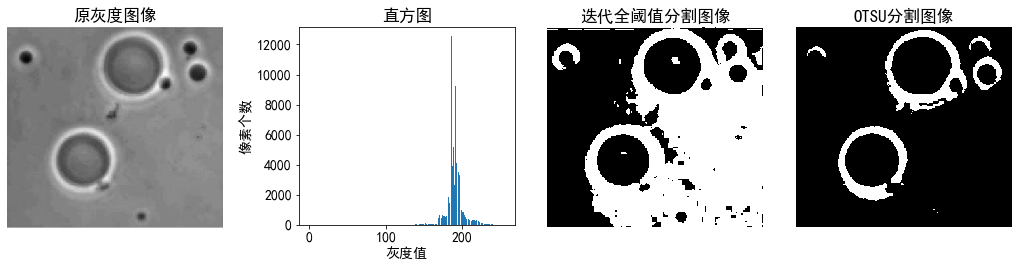

In [6]:
img = cv2.imread(r'..\img\paopao.jpg',0)
T2=basic_global_thresholding(img,T0=0.1)
_,img_result=cv2.threshold(img,T2,255,cv2.THRESH_BINARY)
_,img_otsu=cv2.threshold(img,128,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(15,5))
plt.rcParams.update({"font.size":14})
plt.axes([0.0, 0.1, 0.2, 0.8])
plt.title("原灰度图像")
plt.axis("off")
plt.imshow(img,cmap="gray")
plt.axes([0.27, 0.23, 0.2, 0.55])
plt.title("直方图")
h1=histogram(img)
plt.bar(range(256),h1)
plt.xlabel("灰度值")
plt.ylabel("像素个数")
plt.axes([0.5, 0.1, 0.2, 0.8])
plt.title("迭代全阈值分割图像")
plt.axis("off")
plt.imshow(img_result,cmap="gray")
plt.axes([0.73, 0.1, 0.2, 0.8])
plt.title("OTSU分割图像")
plt.axis("off")
plt.imshow(img_otsu,cmap="gray")
plt.show()

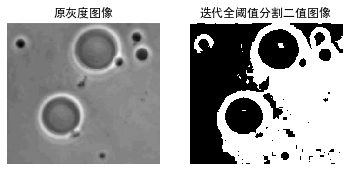

In [31]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img = cv2.imread(r'..\img\paopao.jpg',0)
G1 = np.zeros(img.shape, np.uint8)  # 定义矩阵分别用来装被阈值T1分开的两部分
G2 = np.zeros(img.shape, np.uint8)
T1 = np.mean(img)  #用图像均值做初始阈值
diff=255
T0=0.01
while(diff>T0):
    #THRESH_TOZERO超过T1的像素不变, 其他设为0,THRESH_TOZERO_INV反过来
    _,G1=cv2.threshold(img,T1,255,cv2.THRESH_TOZERO_INV) 
    _,G2=cv2.threshold(img,T1,255,cv2.THRESH_TOZERO)
#     plt.imshow(G2,cmap="gray")
    loc1 = np.where(G1>0.001)  #获得非0像素的坐标
    loc2 = np.where(G2 > 0.001)
    ave1=np.mean(G1[loc1])   #求非0像素的均值
    ave2=np.mean(G2[loc2])
    T2=(ave1+ave2)/2.0
    diff=abs(T2 - T1)
    T1=T2
_,img_result=cv2.threshold(img,T2,255,cv2.THRESH_BINARY)
plt.subplot(121)
plt.title("原灰度图像")
plt.axis("off")
plt.imshow(img,cmap="gray")
plt.subplot(122)
plt.title("迭代全阈值分割二值图像")
plt.axis("off")
plt.imshow(img_result,cmap="gray")
plt.show()
